In [1]:
import tensorflow as tf
import os
import zipfile
import tensorflow_datasets as tfds


# Prepare the Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Colab/dataset.zip'

In [ ]:
!unrar x -Y "/content/drive/MyDrive/Colab/Rice Dataset.rar" "/content/dataset/"

In [4]:
import zipfile

file_dataset = '/content/drive/MyDrive/Colab/dataset_capstone.zip'
zipdata = zipfile.ZipFile(file_dataset, 'r')
zipdata.extractall('dataset')
zipdata.close()


# Model Build

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, PReLU, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(22, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 256)      0

In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
*The settings can be changed later*


In [7]:
from keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = '/content/dataset/DATASET/Train'
training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

VALIDATION_DIR = '/content/dataset/DATASET/Val'
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(200, 200),
    class_mode='categorical',
    batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(200, 200),
    class_mode='categorical',
    batch_size=32
)


Found 28347 images belonging to 22 classes.
Found 7261 images belonging to 22 classes.


In [ ]:
from google.colab import files

model.save('model.h5')
files.download('model.h5')

In [ ]:
model_h5 = '/content/drive/MyDrive/Colab/Model/my_model_rice_new.h5'
model=tf.keras.models.load_model(model_h5)

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint=ModelCheckpoint("/content/checkpoints",
                           monitor='val_accuracy',
                           verbose=1,
                           save_best_only=True,
                           mode='max')


In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      if logs['val_accuracy'] > 0.82:
        if logs['val_loss'] < 0.50:
          self.model.stop_training = True

myCallback = myCallback()

# Train the Model

In [10]:
history = model.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=[myCallback, checkpoint])

Epoch 1/50
886/886 [==============================] - ETA: 0s - loss: 2.2517 - accuracy: 0.2195
Epoch 1: val_accuracy improved from -inf to 0.39788, saving model to /content/checkpoints


886/886 [==============================] - 518s 567ms/step - loss: 2.2517 - accuracy: 0.2195 - val_loss: 1.6800 - val_accuracy: 0.3979
Epoch 2/50
886/886 [==============================] - ETA: 0s - loss: 1.7071 - accuracy: 0.4044
Epoch 2: val_accuracy improved from 0.39788 to 0.50764, saving model to /content/checkpoints


886/886 [==============================] - 486s 549ms/step - loss: 1.7071 - accuracy: 0.4044 - val_loss: 1.3475 - val_accuracy: 0.5076
Epoch 3/50
886/886 [==============================] - ETA: 0s - loss: 1.4462 - accuracy: 0.4959
Epoch 3: val_accuracy improved from 0.50764 to 0.65941, saving model to /content/checkpoints


886/886 [==============================] - 476s 537ms/step - loss: 1.4462 - accuracy: 0.4959 - val_loss: 0.9520 - val_accuracy: 0.6594
Epoch 4/50
886/886 [==============================] - ETA: 0s - loss: 1.3015 - accuracy: 0.5506
Epoch 4: val_accuracy improved from 0.65941 to 0.70197, saving model to /content/checkpoints


886/886 [==============================] - 476s 537ms/step - loss: 1.3015 - accuracy: 0.5506 - val_loss: 0.8806 - val_accuracy: 0.7020
Epoch 5/50
886/886 [==============================] - ETA: 0s - loss: 1.1921 - accuracy: 0.5959
Epoch 5: val_accuracy did not improve from 0.70197
886/886 [==============================] - 482s 545ms/step - loss: 1.1921 - accuracy: 0.5959 - val_loss: 0.9887 - val_accuracy: 0.6944
Epoch 6/50
886/886 [==============================] - ETA: 0s - loss: 1.1140 - accuracy: 0.6212
Epoch 6: val_accuracy improved from 0.70197 to 0.73764, saving model to /content/checkpoints


886/886 [==============================] - 519s 586ms/step - loss: 1.1140 - accuracy: 0.6212 - val_loss: 0.7515 - val_accuracy: 0.7376
Epoch 7/50
886/886 [==============================] - ETA: 0s - loss: 1.0515 - accuracy: 0.6395
Epoch 7: val_accuracy did not improve from 0.73764
886/886 [==============================] - 515s 581ms/step - loss: 1.0515 - accuracy: 0.6395 - val_loss: 0.8585 - val_accuracy: 0.7312
Epoch 8/50
886/886 [==============================] - ETA: 0s - loss: 1.0125 - accuracy: 0.6593
Epoch 8: val_accuracy improved from 0.73764 to 0.78047, saving model to /content/checkpoints


886/886 [==============================] - 478s 539ms/step - loss: 1.0125 - accuracy: 0.6593 - val_loss: 0.6502 - val_accuracy: 0.7805
Epoch 9/50
886/886 [==============================] - ETA: 0s - loss: 0.9783 - accuracy: 0.6685
Epoch 9: val_accuracy did not improve from 0.78047
886/886 [==============================] - 475s 537ms/step - loss: 0.9783 - accuracy: 0.6685 - val_loss: 0.8967 - val_accuracy: 0.7235
Epoch 10/50
886/886 [==============================] - ETA: 0s - loss: 0.9341 - accuracy: 0.6881
Epoch 10: val_accuracy improved from 0.78047 to 0.79204, saving model to /content/checkpoints


886/886 [==============================] - 481s 543ms/step - loss: 0.9341 - accuracy: 0.6881 - val_loss: 0.6274 - val_accuracy: 0.7920
Epoch 11/50
886/886 [==============================] - ETA: 0s - loss: 0.8931 - accuracy: 0.7021
Epoch 11: val_accuracy did not improve from 0.79204
886/886 [==============================] - 477s 538ms/step - loss: 0.8931 - accuracy: 0.7021 - val_loss: 0.6772 - val_accuracy: 0.7835
Epoch 12/50
886/886 [==============================] - ETA: 0s - loss: 0.8598 - accuracy: 0.7110
Epoch 12: val_accuracy did not improve from 0.79204
886/886 [==============================] - 480s 542ms/step - loss: 0.8598 - accuracy: 0.7110 - val_loss: 0.6575 - val_accuracy: 0.7825
Epoch 13/50
886/886 [==============================] - ETA: 0s - loss: 0.8277 - accuracy: 0.7208
Epoch 13: val_accuracy did not improve from 0.79204
886/886 [==============================] - 488s 551ms/step - loss: 0.8277 - accuracy: 0.7208 - val_loss: 0.7580 - val_accuracy: 0.7732
Epoch 14/50
8

886/886 [==============================] - 483s 546ms/step - loss: 0.8150 - accuracy: 0.7268 - val_loss: 0.6005 - val_accuracy: 0.8086
Epoch 15/50
886/886 [==============================] - ETA: 0s - loss: 0.7758 - accuracy: 0.7397
Epoch 15: val_accuracy improved from 0.80857 to 0.81683, saving model to /content/checkpoints


886/886 [==============================] - 519s 586ms/step - loss: 0.7758 - accuracy: 0.7397 - val_loss: 0.5485 - val_accuracy: 0.8168
Epoch 16/50
886/886 [==============================] - ETA: 0s - loss: 0.7703 - accuracy: 0.7429
Epoch 16: val_accuracy did not improve from 0.81683
886/886 [==============================] - 478s 539ms/step - loss: 0.7703 - accuracy: 0.7429 - val_loss: 0.5936 - val_accuracy: 0.8090
Epoch 17/50
886/886 [==============================] - ETA: 0s - loss: 0.7578 - accuracy: 0.7491
Epoch 17: val_accuracy did not improve from 0.81683
886/886 [==============================] - 480s 542ms/step - loss: 0.7578 - accuracy: 0.7491 - val_loss: 0.5793 - val_accuracy: 0.8141
Epoch 18/50
886/886 [==============================] - ETA: 0s - loss: 0.7502 - accuracy: 0.7520
Epoch 18: val_accuracy improved from 0.81683 to 0.84148, saving model to /content/checkpoints


886/886 [==============================] - 479s 541ms/step - loss: 0.7502 - accuracy: 0.7520 - val_loss: 0.5008 - val_accuracy: 0.8415
Epoch 19/50
886/886 [==============================] - ETA: 0s - loss: 0.7289 - accuracy: 0.7578
Epoch 19: val_accuracy improved from 0.84148 to 0.84203, saving model to /content/checkpoints


886/886 [==============================] - 481s 542ms/step - loss: 0.7289 - accuracy: 0.7578 - val_loss: 0.4926 - val_accuracy: 0.8420


Tes Akurasi dan Loss

In [11]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

227/227 [==============================] - 46s 202ms/step - loss: 0.4926 - accuracy: 0.8420
Test Loss: 0.4926469922065735
Test Accuracy: 0.842032790184021


Run code below to show accuracy plot

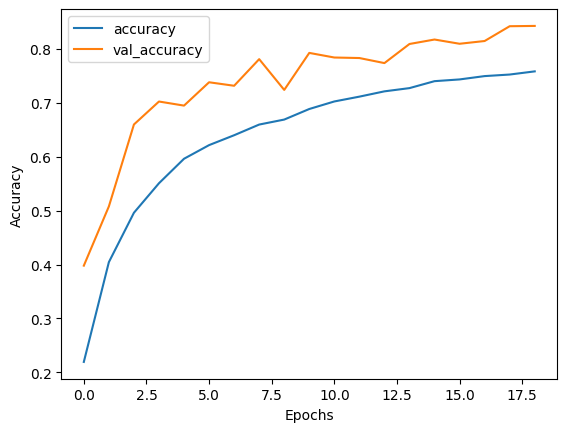

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(19), history.history['accuracy'])
plt.plot(np.arange(19), history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


# Predict image using the model

In [37]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()



for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size=(200, 200))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=100)
  
    predicted_class_index = np.argmax(classes, axis=1)[0]
    predicted_class = class_names[predicted_class_index]
    
    if predicted_class_index < 5:
        print("Chili:", predicted_class)
    elif predicted_class_index < 11:
        print("Rice:", predicted_class)
    elif predicted_class_index < 21:
        print("Tomato:", predicted_class)
    
    print(classes)
    print(fn)
    print("Hasil klasifikasi:", predicted_class)


Saving images (4).jpg to images (4).jpg
1/1 [==============================] - 0s 22ms/step
Tomato: Tomato_Target_Spot
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
images (4).jpg
Hasil klasifikasi: Tomato_Target_Spot


In [24]:
import os
file_path = '/content/dataset/DATASET/Train/Rice_healthy/healthy (1).jpg'
if os.path.exists(file_path):
    print("Image file exists.")
else:
    print("Image file not found.")


Image file exists.


In [26]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/dataset/DATASET/Train/Rice_healthy/healthy (1).jpg', target_size=(200, 200))
img = np.expand_dims(img, axis=0)
#images = np.vstack([img])
classes = model.predict(img, batch_size=100, steps=72)
predicted_class_index = np.argmax(classes, axis=1)[0]
predicted_class = class_names[predicted_class_index]
print(classes)
print(predicted_class_index)
print(fn)
print("Hasil klasifikasi:", predicted_class)

 1/72 [..............................] - ETA: 1s

72/72 [==============================] - 0s 385us/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
20
000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169_180deg.JPG
Hasil klasifikasi: Tomato_Target_Spot


# Save the Trained Model

In [31]:
#Save the trained model as a Keras HDF5 file. 
saved_model_path = "./my_model.h5"
model.save(saved_model_path)
files.download(saved_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp '/content/my_model_rice90.h5' '/content/drive/MyDrive/Colab/Model'

In [ ]:
!cp '/content/model_rice_new.json' '/content/drive/MyDrive/Colab/Model'

Save Model to Json

In [32]:
from tensorflow.keras.models import load_model
from google.colab import files

# Load the saved model
saved_model_path = "./my_model.h5"
model = load_model(saved_model_path)

# Convert the model to JSON format
json_model = model.to_json()

# Save the JSON model to a file
json_model_path = "./my_model.json"
with open(json_model_path, "w") as json_file:
    json_file.write(json_model)

# Download the JSON model file
files.download(json_model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Save to TensorFlow Lite

In [33]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from google.colab import files


saved_model_path = "./my_model.h5"
model = load_model(saved_model_path)


converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


tflite_model_path = "./my_model.tflite"
with open(tflite_model_path, "wb") as tflite_file:
    tflite_file.write(tflite_model)

files.download(tflite_model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert

In [ ]:
with open ("model.tflite","wb") as tflite_file:
     tflite_file.write(converter)

In [ ]:
import os
from PIL import Image

folder_path = '/content/dataset/DATASET/Val'

def check_images(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Verifikasi gambar
            except (IOError, SyntaxError) as e:
                print("File rusak:", file_path)

check_images(folder_path)
